# Tomato Leaf Disease Detection

In [ ]:
#naimur rahaman
#intake 38 id 248

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Data.zip

## Importing the Libraries

In [ ]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

## Importing the Dataset

In [ ]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/train'
valid_path = '/content/val'

#### Inception V3

In [ ]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Folders in the Training Set
folders = glob('/content/train/*')
folders

['/content/train/Anthracnose_Fruit',
 '/content/train/Normal_Fruit',
 '/content/train/Scab_Leaf',
 '/content/train/Giant_Mealybug_Leaf',
 '/content/train/Bacterial_Canker_Leaf',
 '/content/train/Leaf_Cutting_Weevil_Leaf',
 '/content/train/Anthracnose_Leaf',
 '/content/train/Shoot_mold_Leaf',
 '/content/train/Normal_Leaf',
 '/content/train/Fruit_borer_Fruit',
 '/content/train/Bacterial_Canker_Fruit',
 '/content/train/Powdery_Mildew_Leaf',
 '/content/train/Mealybug_Leaf',
 '/content/train/Gall_midge_Leaf',
 '/content/train/Leaf_Coating_Mite_Leaf',
 '/content/train/Red_Rust_Leaf',
 '/content/train/Scab_Fruit',
 '/content/train/Mealybug_Fruit',
 '/content/train/Black_Rot_disease_Fruit',
 '/content/train/Mysterious_cracking_Disease_Fruit']

In [ ]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

In [ ]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Training Generator
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 40350 images belonging to 20 classes.


In [ ]:
# Testing Generator
test_set = test_datagen.flow_from_directory('/content/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8298 images belonging to 20 classes.


In [ ]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
1261/1261 [==============================] - 476s 367ms/step - loss: 1.8463 - accuracy: 0.8342 - val_loss: 0.8127 - val_accuracy: 0.9377
Epoch 2/10
1261/1261 [==============================] - 462s 367ms/step - loss: 1.1970 - accuracy: 0.9233 - val_loss: 0.5812 - val_accuracy: 0.9617
Epoch 3/10
1261/1261 [==============================] - 466s 370ms/step - loss: 1.0208 - accuracy: 0.9424 - val_loss: 0.8131 - val_accuracy: 0.9513
Epoch 4/10
1261/1261 [==============================] - 468s 371ms/step - loss: 0.9589 - accuracy: 0.9535 - val_loss: 0.7220 - val_accuracy: 0.9648
Epoch 5/10
1261/1261 [==============================] - 463s 367ms/step - loss: 0.9440 - accuracy: 0.9586 - val_loss: 0.6224 - val_accuracy: 0.9726
Epoch 6/10
1261/1261 [==============================] - 463s 367ms/step - loss: 0.8555 - accuracy: 0.9645 - val_loss: 0.6410 - val_accuracy: 0.9731
Epoch 7/10
1261/1261 [==============================] - 462s 366ms/step - loss: 0.8353 - accuracy: 0.9676 - val_

## Visualize the model training by plotting Loss Function and Accuracy

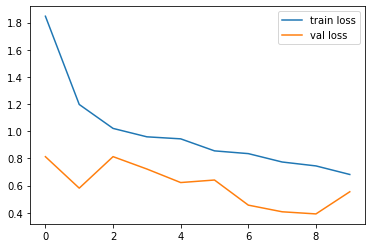

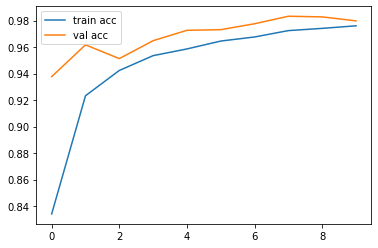

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
li=['Anthracnose_Fruit', 'Anthracnose_Leaf', 'Bacterial_Canker_Fruit', 'Bacterial_Canker_Leaf', 'Black_Rot_disease_Fruit', 'Fruit_borer_Fruit', 'Gall_midge_Leaf', 'Giant_Mealybug_Leaf', 'Leaf_Coating_Mite_Leaf', 'Leaf_Cutting_Weevil_Leaf', 'Mealybug_Fruit', 'Mealybug_Leaf', 'Mysterious_cracking_Disease_Fruit', 'Normal_Fruit', 'Normal_Leaf', 'Powdery_Mildew_Leaf', 'Red_Rust_Leaf', 'Scab_Fruit', 'Scab_Leaf', 'Shoot_mold_Leaf']

Following is our prediction:


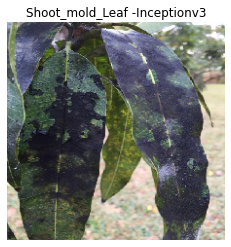

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/q.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name+ " -Inceptionv3")
plt.show()

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[2.2761736e-35, 1.0000000e+00, 4.9953767e-30, ..., 0.0000000e+00,
        2.4183147e-32, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5787742e-23, 1.0000000e+00, 3.9931668e-26, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.9600962e-31, 0.0000000e+00, 3.7623045e-30, ..., 0.0000000e+00,
        0.0000000e+00, 2.8226938e-26],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.9725606e-27, 2.9429740e-17, 2.0605025e-07, ..., 1.0230512e-28,
        1.1873254e-22, 3.3261676e-21]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 9, 1, ..., 5, 7, 3])